# Working with Missing data in pandas

In [28]:
import pandas as pd
import numpy as np

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [29]:
incomplete_df = pd.DataFrame({'id': [1,2,3,2,2,3,1,1,1,2,4],
                              'type': ['one', 'one', 'two', 'three', 'two', 'three', 'one', 'two', 'one', 'three','one'],
                              'amount': [345,928,np.NAN,645,113,942,np.NAN,539,np.NAN,814,np.NAN] 
                             }, columns=['id','type','amount'])

Column 'amount' is the only one with missing values. Now we display the dataframe

In [30]:
#TODO: display the dataframe
incomplete_df


,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


Recall that summary statistics and arithmetic with missing data is natively supported by pandas. Let's define two series, both containing some missing values.

In [31]:
A = incomplete_df['amount']
B = pd.Series(data=[np.NAN,125,335,345,312,np.NAN,np.NAN,129,551,800,222])

In [32]:
#TODO: print the content of A
print(A)
print ('\n')

#TODO: print the content of B
print(B)

0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64


0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64


The mean is computed normally and missing values are ignored:

In [33]:
# TODO: Compute and print the mean value of A
A.mean()

618.0

In [34]:
np.mean(A)

618.0

Min, Max, STD and Variance all work even when data are missing:

In [35]:
# TDOD: Compute and display the min, max, standard deviation and variance of B
print(B.min())
print(B.max())
print(B.std())
print(B.var())

125.0
800.0
226.90459763647678
51485.69642857143


In [36]:
B.min(), B.max(), B.std(), B.var()

(125.0, 800.0, 226.90459763647678, 51485.69642857143)

We can also perform element-wise arithmetic operations between series with missing data. Note that by definition the result of any operation that involves missing values is NaN.

In [37]:
# TODO: Perform element-wise addition between the values in A and B
A + B

0        NaN
1     1053.0
2        NaN
3      990.0
4      425.0
5        NaN
6        NaN
7      668.0
8        NaN
9     1614.0
10       NaN
dtype: float64

In [38]:
np.add(A, B)

0        NaN
1     1053.0
2        NaN
3      990.0
4      425.0
5        NaN
6        NaN
7      668.0
8        NaN
9     1614.0
10       NaN
dtype: float64

### Filling missing values

Recall that pandas has a function that allows you to drop any rows in a dataframe (or elements in a series) that contain a missing value.

In [39]:
# TODO: Print the values of attribute A before removing the null values
print("original\n", A)


# TODO: now, print the values of A but without the null values 
print("updated\n", A.dropna())


original
 0     345.0
1     928.0
2       NaN
3     645.0
4     113.0
5     942.0
6       NaN
7     539.0
8       NaN
9     814.0
10      NaN
Name: amount, dtype: float64
updated
 0    345.0
1    928.0
3    645.0
4    113.0
5    942.0
7    539.0
9    814.0
Name: amount, dtype: float64


However, very often you may wish to fill in those missing values rather than simply dropping them. Of course, pandas also has that functionality. For example, we could fill missing values with a scalar number, as shown below.

In [40]:
# TODO: replace the missing value with -99 in attribute A
A.fillna(-99)


0     345.0
1     928.0
2     -99.0
3     645.0
4     113.0
5     942.0
6     -99.0
7     539.0
8     -99.0
9     814.0
10    -99.0
Name: amount, dtype: float64

In [41]:
# TODO: replace the missing value with -99 in the dataframe
incomplete_df.fillna(-99)

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,-99.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,-99.0
7,1,two,539.0
8,1,one,-99.0
9,2,three,814.0


That actually works with any data type.

In [42]:
# TODO: fill the missing values with the string 'unknown' in attribute A
print(A.fillna("unknown"))


0         345
1         928
2     unknown
3         645
4         113
5         942
6     unknown
7         539
8     unknown
9         814
10    unknown
Name: amount, dtype: object


As such, we can use this functionality to fill in the gaps with the average value computed across the non-missing values.

In [43]:
# TODO: replace the missing values with the average value of the non-missing values
A.fillna(A.mean())


0     345.0
1     928.0
2     618.0
3     645.0
4     113.0
5     942.0
6     618.0
7     539.0
8     618.0
9     814.0
10    618.0
Name: amount, dtype: float64

Even better, if we want to fill in the gaps with mean values of corresponding *id's* (recall our initial dataframe printed below), the following two lines of code perform that seemingly complex task.

In [44]:
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,NaN
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,NaN
7,1,two,539.0
8,1,one,NaN
9,2,three,814.0


In [45]:
# Fill in gaps in the 'amount' column with means obtained from corresponding id's in the first column
incomplete_df["amount"].fillna(incomplete_df.groupby("id")["amount"].transform("mean"),inplace=True)

#TODO: display the dataframe. What do you see?
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


In [46]:
# TODO: If there is no corresponding id and the cell is still null, simply use the overall mean
incomplete_df["amount"].fillna(incomplete_df["amount"].mean(), inplace=True)
incomplete_df

,id,type,amount
0,1,one,345.0
1,2,one,928.0
2,3,two,942.0
3,2,three,645.0
4,2,two,113.0
5,3,three,942.0
6,1,one,442.0
7,1,two,539.0
8,1,one,442.0
9,2,three,814.0


You can fill values forwards and backwards with the flags *pad* / *ffill* and *bfill* / *backfill*

In [47]:
# TODO: fill the missing values in B with the values in the previous records (no limit)
print (B)
print ('\n')    # line to separate the output
B.fillna(method = 'pad')

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64




0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5     312.0
6     312.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

We can set a limit if we only want to replace consecutive gaps.

In [48]:
# TODO: fill the missing values in B with the value in the next record (the value of a record can be used in the previous record only)
print (B)
print ('\n')    # line to separate the output
B.fillna(method = 'bfill', limit = 1)

0       NaN
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6       NaN
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64




0     125.0
1     125.0
2     335.0
3     345.0
4     312.0
5       NaN
6     129.0
7     129.0
8     551.0
9     800.0
10    222.0
dtype: float64

### Outlier detection

We can use the data pid.csv to practice on outlier detection

In [49]:
# TODO: read the csv file pid
df = pd.read_csv('pid.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''])



In [50]:
# TODO: for each column except the label column, compute the standard deviation of the columns
# report all the values that are at distance > 3 * std from the mean value as outliers.
def stat_outliers (col):
    outliers = set()
    m = col.mean()
    s = col.std()
    for p in col.unique():
        if (abs(p-m) > 3 * s):
            outliers.add(p)
    return outliers

for col in df.columns:
    print("Outliers in column ", col, " are: ", stat_outliers(df[col]))


Outliers in column  A  are:  {17, 14, 15}
Outliers in column  B  are:  {0}
Outliers in column  C  are:  {0}
Outliers in column  D  are:  {99}
Outliers in column  E  are:  {480, 545, 579, 485, 440, 510, 744, 680, 846, 495, 465, 600, 474, 540, 478, 543}
Outliers in column  F  are:  {0.0, 59.4, 67.1, 57.3}
Outliers in column  G  are:  {1.893, 2.2880000000000003, 2.329, 1.476, 1.781, 2.137, 1.7309999999999999, 1.6, 2.42, 1.699, 1.6980000000000002}
Outliers in column  H  are:  {72, 81, 69, 70}
Outliers in column  Label  are:  set()


In [51]:
# TODO: Apply LOF to find outliers with the values in columns C,D together. 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
X = np.r_[df[['C', 'D']]]
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

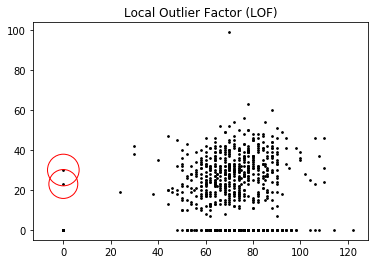

In [52]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(X[:, 0], X[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.show()

# Data Transformation

We begin by defining a pandas dataframe that contains some cells with missing values. Note that pandas, in addition to allowing us to create dataframes from a variety of files, also supports explicit declaration.

In [53]:
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


### Data Sampling

To select a random subset without replacement, one way is to slice off the first k elements of the array returned by permutation, where k is the desired subset size. Here, we use the 'take' method, which retrieves elements along a given axis at the given indices. Using this function, we slice off the first three elements:

In [54]:
# TODO: perform permutation over the index of the dataframe and take the first three records
df_sampled_without_replacement = df.take(np.random.permutation(len(df))[:3])
df_sampled_without_replacement

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
0,0,1,2,3


In [55]:
df.sample(frac=1).take(range(0,3))

,0,1,2,3
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15


To generate a sample with replacement, we can draw random integers.

In [56]:
# TODO: draw three random integer values from the index values of the dataframe 
# (Note that the default index of the dataframe starts from 0)
df.sample(n = 3, replace = True)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19


In [57]:
# OR you can generate a set of random integer samples of size three
sampler = np.random.randint(0, len(df), size=3)

These random integers can be used as input for the 'take' method, which is then used to sample the data. Since the random integers consistuting the array may be repeated, the rows sampled by this method may also be repeated -- or, in other words, sampled with replacement.

In [58]:
# Extract the row with indexes drawn in the previous step
df.take(sampler)

,0,1,2,3
3,12,13,14,15
4,16,17,18,19
3,12,13,14,15


In [59]:
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4),
index = ['een', 'twee', 'drie', 'vier', 'vijf'])
df_sampled_without_replacement = df.take(np.random.permutation(len(df))[:3])
df_sampled_without_replacement

,0,1,2,3
vijf,16,17,18,19
twee,4,5,6,7
vier,12,13,14,15


### Data Normalization or Standardization

Aside from sampling data, we may also want to normalize or standardize our data.

In [60]:
# TODO: normalize the values in the df by dividing each value over the sum of ALL values in the dataframe
df = pd.DataFrame(np.arange(5 * 4). reshape(5, 4))
normalizedDF = df/df.sum().sum().astype("float")
normalizedDF

,0,1,2,3
0,0.000000,0.005263,0.010526,0.015789
1,0.021053,0.026316,0.031579,0.036842
2,0.042105,0.047368,0.052632,0.057895
3,0.063158,0.068421,0.073684,0.078947
4,0.084211,0.089474,0.094737,0.100000


In [65]:
# TODO: normalize the values in each column of the df by dividing the values of each column over 
# the sum of the values in that column
df_norm = df / df.sum().astype('float')
df_norm

,0,1,2,3
0,0.0,0.022222,0.04,0.054545
1,0.1,0.111111,0.12,0.127273
2,0.2,0.200000,0.20,0.200000
3,0.3,0.288889,0.28,0.272727
4,0.4,0.377778,0.36,0.345455


In [64]:
# TODO: normalize the values in the df by dividing each value over the average of ALL values in the dataframe
normalizedDF = df/df.mean().mean().astype('float')
normalizedDF

AttributeError: 'float' object has no attribute 'astype'

In [66]:
# TODO: normalize the values in each column of the df by dividing the values of each column over 
# the average of the values in that column
df_norm = df / df.mean().astype('float')
df_norm

,0,1,2,3
0,0.0,0.111111,0.2,0.272727
1,0.5,0.555556,0.6,0.636364
2,1.0,1.000000,1.0,1.000000
3,1.5,1.444444,1.4,1.363636
4,2.0,1.888889,1.8,1.727273


In [69]:
# TODO: normalize the data in the df by mapping the values to the interval [-5,5] 
# (all the values in the dataframe are normalized together)
new_min = -5           # new minimum of the values in the whole dataframe
new_max = 5            # new maximum of the values in the whole dataframe

m = df.mean().mean()    # mean value of the values in the whole dataframe
old_min = df.min().min()     # Old minimum of the values in the whole dataframe
old_max = df.max().max()     # Old maximum of the values in the whole dataframe
df_norm = (df - old_min) / (old_max - old_min) * (new_max - new_min) + new_min 
df_norm

,0,1,2,3
0,-5.000000,-4.473684,-3.947368,-3.421053
1,-2.894737,-2.368421,-1.842105,-1.315789
2,-0.789474,-0.263158,0.263158,0.789474
3,1.315789,1.842105,2.368421,2.894737
4,3.421053,3.947368,4.473684,5.000000


In [70]:
# TODO: normalize the data in the df by mapping the values to the interval [-5,5]
new_min = -5           # new minimum of the values in each attribute
new_max = 5            # new maximum of the values in each attribute

m = df.mean().astype('float')   # mean value of the values in each attribute
old_min = df.min()     # Old minimum of the values in each attribute
old_max = df.max()     # Old maximum of the values in each attribute
df_norm = (df - old_min) / (old_max - old_min) * (new_max - new_min) + new_min 
df_norm

,0,1,2,3
0,-5.0,-5.0,-5.0,-5.0
1,-2.5,-2.5,-2.5,-2.5
2,0.0,0.0,0.0,0.0
3,2.5,2.5,2.5,2.5
4,5.0,5.0,5.0,5.0


### Data Reduction (Principal Component Analysis)

We will use the iris dataset to demonstrate the use of PCA

In [71]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [86]:
# load dataset into Pandas DataFrame from the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [73]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Original data has 4 columns, we would like to project the data into 2 dimensional data

In [74]:
pca = PCA(n_components = 2)               # You can also use pca = PCA(2)
pcs = pca.fit_transform(x)
pcsDF = pd.DataFrame(data = pcs, columns = ['PC1', 'PC2'])

Extract and diisplay the eigenvectors, eigenvalues. Note that we allready eliminated the PCs with small eigenvalues. We only extraced two PCs

In [75]:
eigenvectors, eigenvalues = pca.components_, pca.explained_variance_
eigenvectors, eigenvalues

(array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
        [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]]),
 array([2.93035378, 0.92740362]))

We can also start by computing the 4 PCs and discard the ones that are not required later. 

In [76]:
pca1 = PCA(n_components = 4)               # You can also use pca = PCA(2)
pcs1 = pca1.fit_transform(x)
pcsDF1 = pd.DataFrame(data = pcs1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

Now, we can extract the first two PCs

In [77]:
pcsDF_red = pcsDF1[['PC1', 'PC2']]
pcsDF_red

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


It should be clear that the dataframes generated in both ways are the same

In [78]:
pcsDF - pcsDF_red

,PC1,PC2
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145,0.0,0.0
146,0.0,0.0
147,0.0,0.0
148,0.0,0.0


We can plot the values of the eigenvalues and make sure that the discarded components have eigenvalues smaller than 1. 

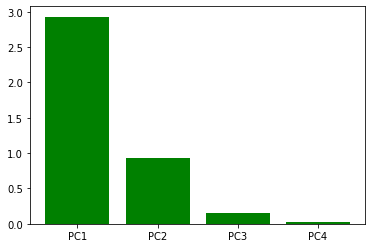

In [79]:
eigenvectors1, eigenvalues1 = pca1.components_, pca1.explained_variance_
plt.bar(np.array([1,2,3,4]), eigenvalues1, color = 'green')
plt.xticks(np.array([1,2,3,4]), ('PC1', 'PC2', 'PC3', 'PC4'))
plt.show()

We can also plot the projected data on the two components with the eigenvectors in the same plot to see the directions of the eigenvectors

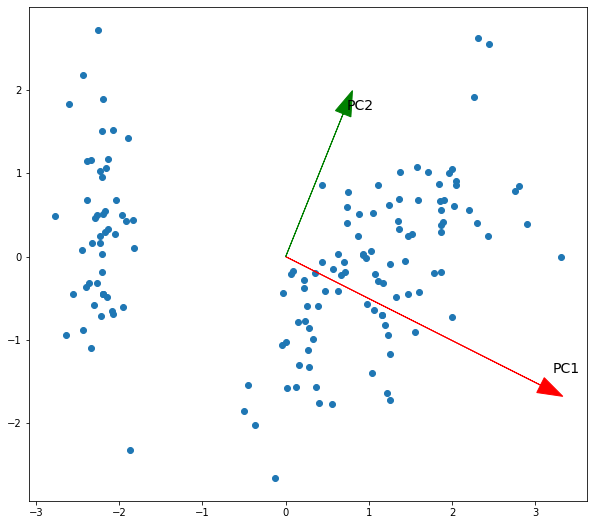

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(pcsDF1["PC1"], pcsDF1["PC2"])
K = 2
mu = pcs1.mean(axis=0)

i = 1
for axis, color in zip(eigenvectors1[:K], ["red","green"]):
#     start, end = mu, mu + sigma * axis ### leads to "ValueError: too many values to unpack (expected 2)"

    # So I tried this but I don't think it's correct
    start, end = (mu)[:K], (mu + 2 * eigenvalues1[i-1] * axis)[:K]
    pc = 'PC'+str(i)
    ax.arrow(start[0], start[1], end[0], end[1], head_width=0.2, head_length=0.3, fc = color, ec=color)
    ax.annotate(pc, (end[0] + 0.05 * eigenvalues1[i-1], end[1] + 0.05 * eigenvalues1[i-1]),fontsize=14)
    i += 1


ax.set_aspect('equal')
plt.show()

Now, let's apply the same concept on synthetic data extract from two dimensional normal distribution

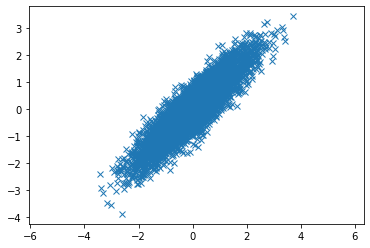

In [81]:
mean = [0, 0]
cov = [[1, 0.9], [0.9, 1]]
db = np.random.multivariate_normal(mean, cov, 5000).T
db = db.transpose()
syntheticDF = pd.DataFrame(data = db, columns = ['x', 'y'])
plt.plot(syntheticDF['x'], syntheticDF['y'], 'x')
plt.axis('equal')
plt.show()

Apply the same steps as we did for the iris data but at the end, plot the orginal data (not the projected data)
First, compute the 2 PCs

In [83]:
pca2 = PCA(n_components = 2)               # You can also use pca = PCA(2)
pcs2 = pca2.fit_transform(db)
pcsDF2 = pd.DataFrame(data = pcs2, columns = ['PC1', 'PC2'])

Extract and display the eigenvalues, eigenvectors

In [84]:
eigenvectors2, eigenvalues2 = pca2.components_, pca2.explained_variance_
eigenvectors2, eigenvalues2

(array([[ 0.70514542,  0.70906272],
        [ 0.70906272, -0.70514542]]),
 array([1.92821403, 0.10063765]))

Plot the original data with the eigenvectors

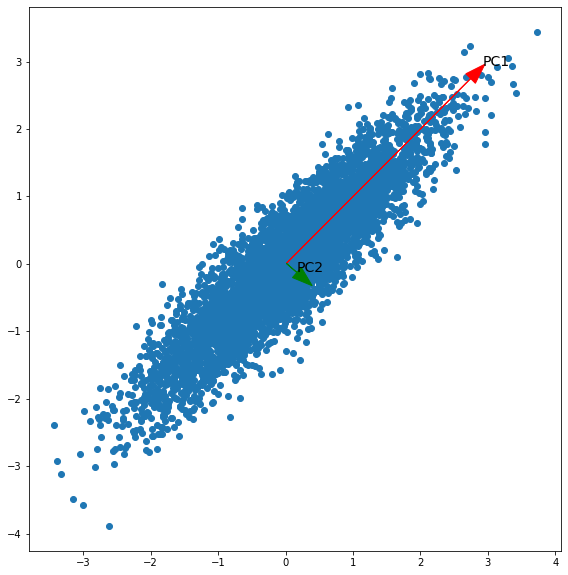

In [85]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(syntheticDF["x"], syntheticDF["y"])
K = 2
mu = db.mean(axis=0)

i = 1
for axis, color in zip(eigenvectors2[:K], ["red","green"]):
#     start, end = mu, mu + sigma * axis ### leads to "ValueError: too many values to unpack (expected 2)"

    # So I tried this but I don't think it's correct
    start, end = (mu)[:K], (mu + 2 * eigenvalues2[i-1] * axis)[:K]
    pc = 'PC'+str(i)    
    ax.arrow(start[0], start[1], end[0], end[1], head_width=0.2, head_length=0.3, fc = color, ec=color)
    ax.annotate(pc, (end[0] + 0.1 * eigenvalues2[i-1], end[1] + 0.1 * eigenvalues2[i-1]),fontsize=14)
    i += 1



ax.set_aspect('equal')
plt.show()